In [36]:
# 도미 데이터
bream_length = [25.4,26.3,26.5,29.0,29.0,29.7,29.7,30.0,30.0,30.7,31.0,
                31.0,31.5,32.0,32.0,32.0,33.0,33.0,33.5,33.5,
                34.0,34.0,34.5,35.0,35.0,35.0,35.0,36.0,36.0,37.0,
                38.5,38.5,39.5,41.0,41.0]
bream_weight = [242.0,290.0,340.0,363.0,430.0,450.0,500.0,390.0,
                450.0,500.0,475.0,500.0,500.0,340.0,600.0,600.0,
                700.0,700.0,610.0,650.0,575.0,685.0,620.0,680.0,
                700.0,725.0,720.0,714.0,850.0,1000.0,920.0,955.0,
                925.0,975.0,950.0]
len(bream_weight)


35

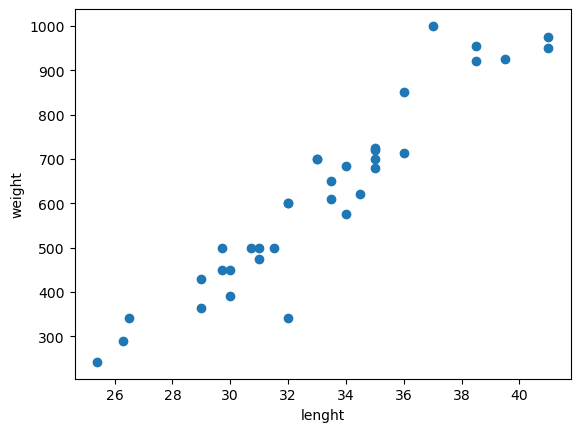

In [37]:
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

In [38]:
# 빙어 데이터 
smelt_length = [9.8,10.5,10.6,11.0,11.2,11.3,11.8,11.8,12.0,12.2,
                12.4,13.0,14.3,15.0]
smelt_weight = [6.7,7.5,7.0,9.7,9.8,8.7,10.0,9.9,9.8,12.2,13.4,
                12.2,19.7,19.9]

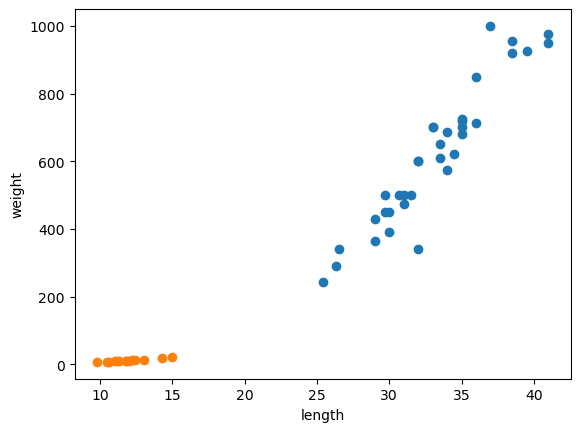

In [39]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [40]:
# 도미와 빙어 데이터 합치기
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

In [41]:
# 2차원 배열로 변경
fish_data = [[l,w] for l, w in zip(length,weight)]

In [42]:
# 정답 준비
fish_target = [1]*35 + [0]*14
# 정답을 1,0으로 분류한 것을 이진 분류라고 한다.

In [43]:
#K-최근접 이웃
from sklearn.neighbors import KNeighborsClassifier

In [44]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data,fish_target)
# 정확도가 1.0 나온다 

1.0

In [45]:
kn.predict([[30,600]])
# 출력하면 array([1])이 나온다. 
# 1이 도미 0이 빙어이므로 즉 kn.predict([[30,600]])은 도미이다. 

array([1])

In [46]:
# 도미가 나올 확률
kn49 = KNeighborsClassifier(n_neighbors=49)
#n_neighbors를 통해 샘플의 수를 설정할 수 있다.
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)
# print(35/49)

0.7142857142857143

In [47]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [48]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
KN = kn.fit(train_input,train_target)
kn.score(test_input,test_target)


0.0

In [49]:
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [50]:
# 데이터 섞기(도미와 빙어 데이터가 적절하게 섞을 수 있도록 해야 함)
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

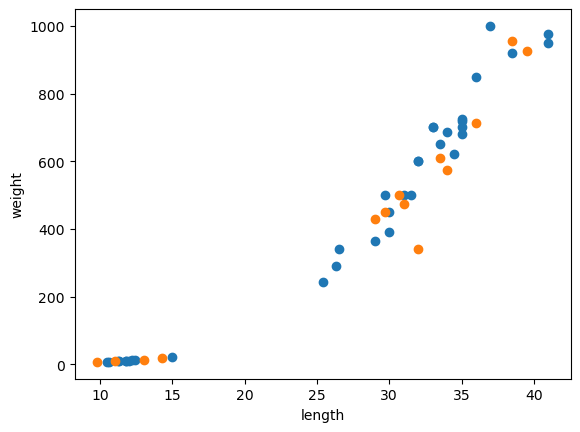

In [51]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [52]:
kn = kn.fit(train_input, train_target)
kn.score(test_input,test_target)

1.0

In [53]:
fish_length = bream_length+smelt_length
fish_weight = bream_weight+smelt_weight

In [54]:
fish_data = np.column_stack((fish_length,fish_weight))

In [55]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

사이킷런으로 데이터 나누기

In [56]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)
# stratify는 샘플링 불균형을 해소하기 위해 사용.
# random_state=42 는 랜덤시드 

[0.]


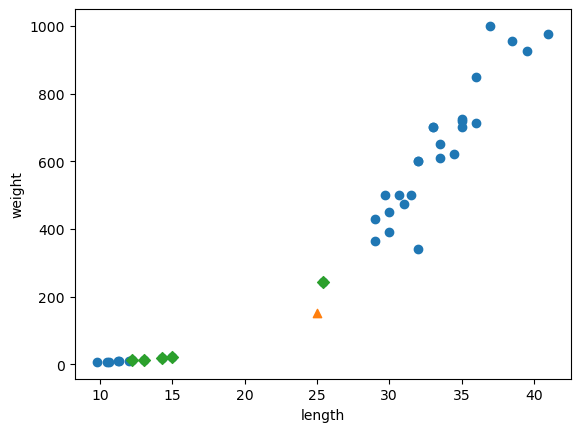

In [57]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

print(kn.predict([[25,150]]))

distances, indexes= kn.kneighbors([[25,150]])
# 영향을 받은 5개의 데이터를 뽑아냄

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

기준을 맞춰라

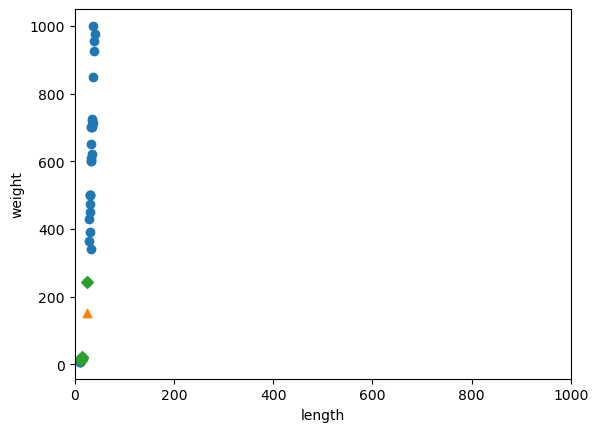

In [58]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

표준 점수로 바꾸기

In [59]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)

train_scaled= (train_input - mean) / std

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


수상한 도미 다시 표시하기

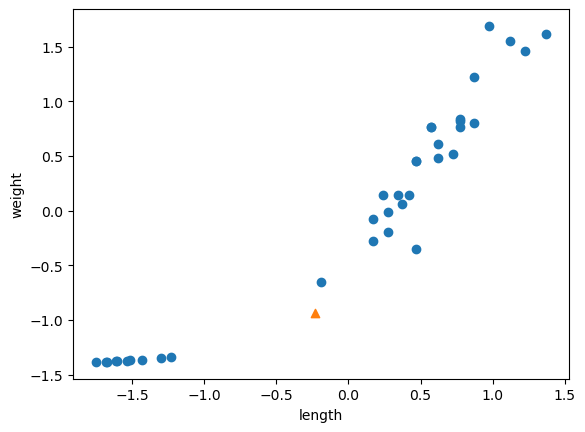

In [60]:
new = ([25,150]-mean)/std

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

전처리 데이터에서 모델 훈련

[1.]


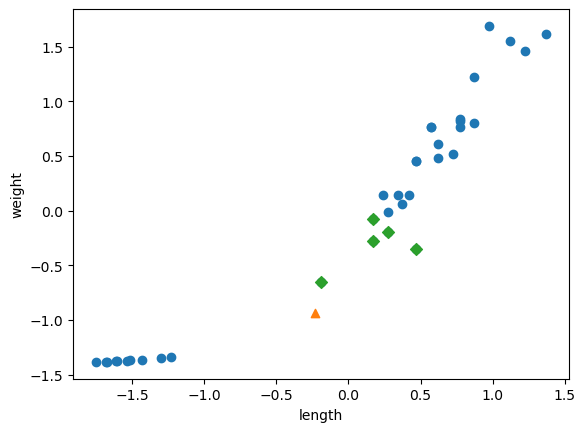

In [61]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input -mean)/std
kn.score(test_scaled, test_target)

print(kn.predict([new]))

distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

농어의 길이만 사용

In [62]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

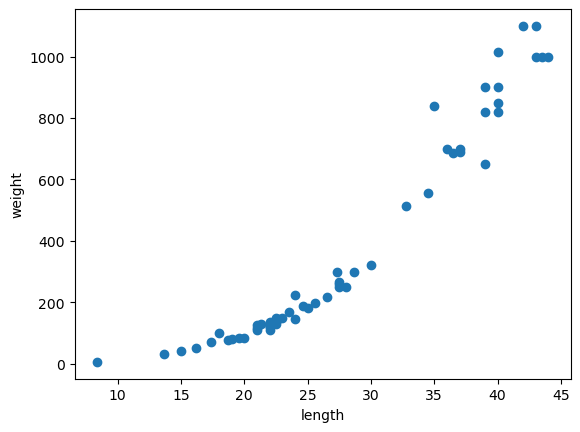

In [63]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

회귀모델 훈련

In [75]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

knr.score(test_input, test_target)
#1에 가까울 수록 좋은 회귀모델이다.

from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [76]:
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))
# 일반적으로 train보다 test가 낮게 나온다.

0.9698823289099254
0.992809406101064


이웃 개수 줄이기

In [77]:
knr.n_neightbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))

print(knr.score(test_input,test_target))

# 이웃 갯수를 5개에서 3개로 줄이니 과대적합 및 과소 적합 문제를 해결

0.9698823289099254
0.992809406101064


길이가 50cm 농어의 무게값 예측

In [73]:
print(knr.predict([[50]]))

[1010.]


50cm 농어의 이웃

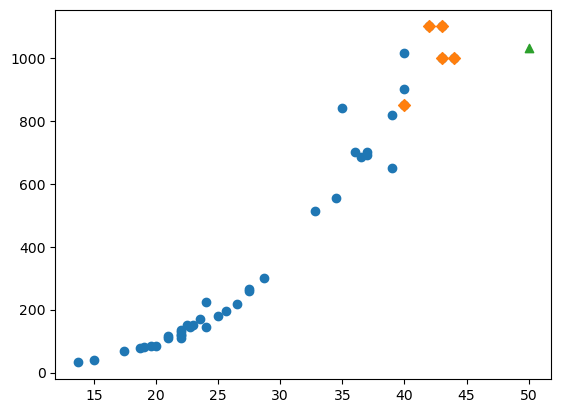

In [78]:
#50cm. 농어의 이웃을 구합니다. 
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다. 
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes],
            marker='D')
#50cm 농어 데이터
plt.scatter(50,1033,marker='^')
plt.show()